In [15]:
using Plots, PlotRecipes, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
include("simple_ODE_solvers.jl")

cobweb_plot! (generic function with 1 method)

In [3]:
?cobweb_plot

search: cobweb_plot cobweb_plot!



```
    cobweb_plot(f::Function, x0, rangex, n)
```

Función que hace el mapeo tipo cobweb. Este se usa cuando el plot no se a definido.


In [4]:
f(x) = logistic_equation(x, 3)

f (generic function with 1 method)

In [16]:
@gif for i in 0:30
    
    cobweb_plot(f, 0.01, 0:1/32:1, i)
    
end every 1

INFO: Saved animation to /Users/claudiopierard/Nonlinear_dynamics/tmp.gif


Plots.AnimatedGif("/Users/claudiopierard/Nonlinear_dynamics/tmp.gif")


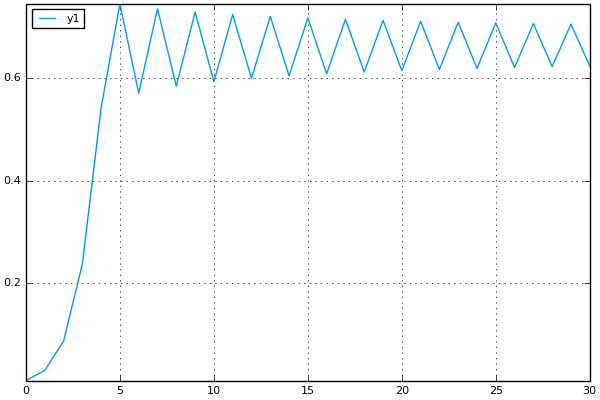

In [6]:
xx, fx = iterator(f, 30, 0.01)
plot(xx, fx)

# Bifurcation Diagram

Write a program to construct a bifurcation diagram for the logistic map.  (Hint: this should be a loop that calls your logistic map program from Unit 1.3.)  Your program should take the following arguments:

In [7]:
?logistic_iterator

search: logistic_iterator



```
  logistic_iterator(x0, r, n)
  OUT:  iteration_serie, evaluations
```

This function iterates the logistic equation, and gives back the number of iteration vs. the recursive evaluations of the logistic equation. `x0` is the initial condition, `r` is the rate parameter, n is the number of iterations, and `yn` is an optional argument.


In [73]:
f(x) = logistic_equation(0.9, 3)

f (generic function with 1 method)

In [77]:
ns, xn = logistic_iterator(.9, 3, 10)

([0,1,2,3,4,5,6,7,8,9,10],Any[0.9,0.26999999999999996,0.5912999999999998,0.7249929300000001,0.5981345443500452,0.721108833615627,0.6033326510914108,0.7179670896552623,0.6074710434816444,0.7153499244388996,0.6108732301324807])


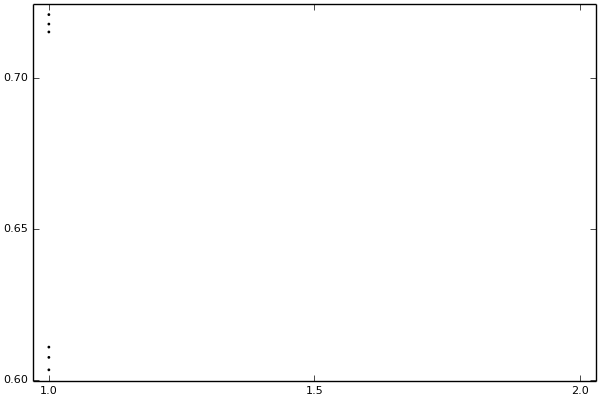

In [78]:
deleteat!(xn, 1:5)
rs = ones(length(xn))

scatter(rs, xn, markersize=1, c=:black, leg=false, grid=false)

In [23]:
?iterator

search: iterator Iterators logistic_iterator Interpolations



```
  iterator(f, n, x0)
  OUT:  steps, solutions
```

This is a function used to iterate a single variable function `f` (R -> R).


In [74]:
ns, orbit = iterator(f, 20, 0.1)

([0,1,2,3,4,5,6,7,8,9  …  11,12,13,14,15,16,17,18,19,20],[0.1,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27  …  0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27])

In [75]:
deleteat!(orbit, 1:5)
rs = ones(length(orbit))
orbit

16-element Array{Float64,1}:
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27
 0.27


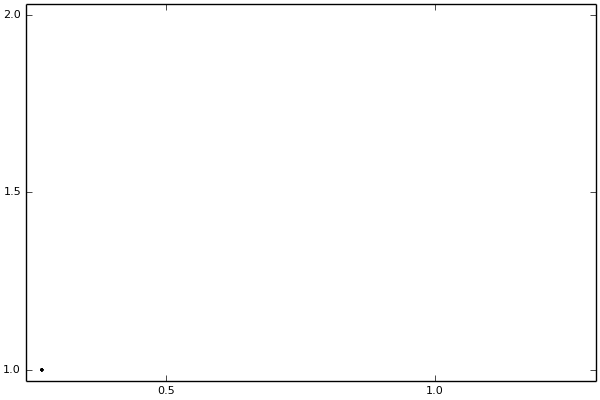

In [76]:
scatter(orbit,rs, markersize=1, c=:black, leg=false, grid=false)

In [33]:
function bifurcation(x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range
        
        enes, solution = logistic_iterator(x0, r, n)
        
        deleteat!(solution, 1:k)
        rs = similar(solution) 
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        push![orbit, solution]
        push![r_par, rs]
        
    end
    
    
    
        
        
        
        

LoadError: LoadError: syntax: incomplete: "for" at In[33]:5 requires end
while loading In[33], in expression starting on line 1

In [80]:
?logistic_iterator

search: logistic_iterator



```
  logistic_iterator(x0, r, n)
  OUT:  iteration_serie, evaluations
```

This function iterates the logistic equation, and gives back the number of iteration vs. the recursive evaluations of the logistic equation. `x0` is the initial condition, `r` is the rate parameter, n is the number of iterations, and `yn` is an optional argument.
